<a href="https://colab.research.google.com/github/saisrija2/codsoft/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
le_gender = LabelEncoder()
le_geo = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])
df['Geography'] = le_geo.fit_transform(df['Geography'])

In [ ]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [ ]:
models = {'Logistic Regression': log_reg, 'Random Forest': rf, 'Gradient Boosting': gb}

for name, model in models.items():
    print(f"---{name}---")
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:,1]))
    print()

---Logistic Regression---
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.60      0.18      0.28       393

    accuracy                           0.82      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.82      0.77      2000

ROC AUC Score: 0.7635535372440231

---Random Forest---
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

ROC AUC Score: 0.8566917002744039

---Gradient Boosting---
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.8

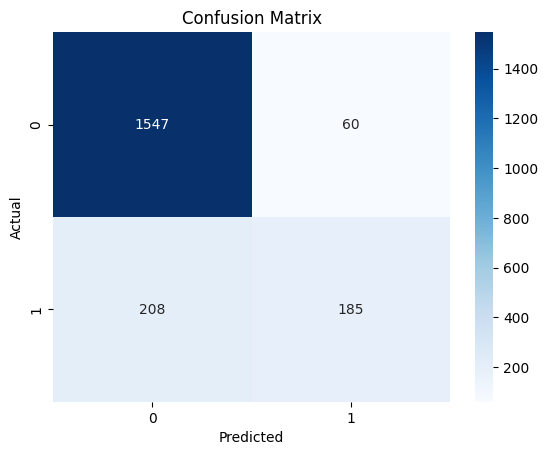

In [ ]:
best_model = gb
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()